In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('NAS.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
#Put your desired date here
inputdato = '2016-07-13'
#Put your desired amount of prediction days for the algorithm, recommended amount of days is max 25
#making it predict more days before the desired date, makes it more accurate
#We saw this from doing different tests where it was less accurate if we made it only predict 1 day
prediction_days = 25

In [4]:
df = df.dropna()

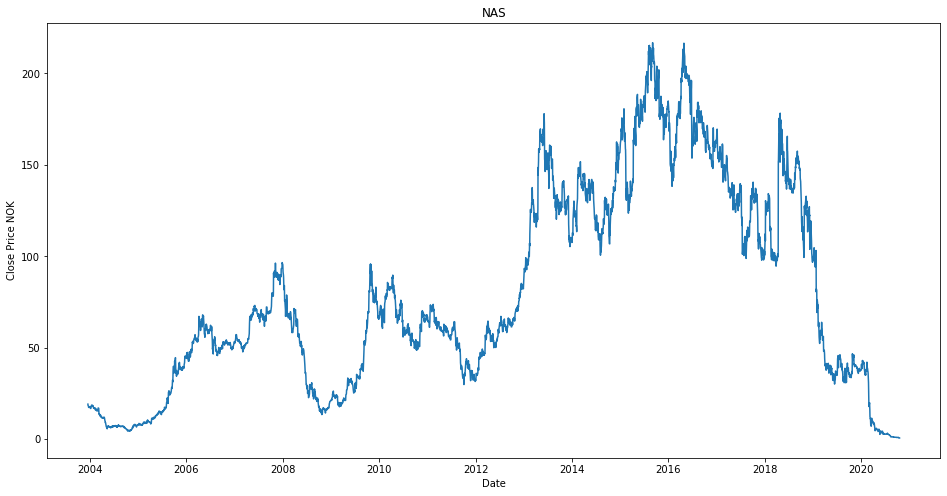

In [5]:
plt.figure(figsize=(16,8))
plt.title('NAS')
plt.xlabel('Date')
plt.ylabel('Close Price NOK')
plt.plot(df['Date'],df['Close'])
#plt.plot(df['Close'])
plt.show()

In [6]:
#Removing all columns and focusing on the close price
#Here we are using copy because we are making a full new copy
df = df[['Date','Close']].copy()

#Here is the desired date to predict the price 
#Creating a dataframe with all the dates up to the desired date
inputdf = df[['Date','Close']].copy()
inputdf = inputdf.loc[df['Date'] <= inputdato]

In [7]:
#Here we are creating a variable for the amount of days into the future
#The purpose of this is to train the algorithm 
future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
df['Prediction'] = df[['Close']].shift(-future_days)

In [8]:
#Here we are creating the feature data set (X) and converting it into a numpy array where we ignore the last 'x' days
#Training input X = the closing prices before the 25 last days
X = np.array(df.drop(['Prediction','Date'], 1)) [:-future_days] #This method makes the closing values in a column
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 1.054   ]
 [ 1.042   ]
 [ 1.0425  ]]


In [9]:
#Here we are creating the target data set (y) and converting it into a numpy array where we ignore the last 'x' days
#Training output y = the predicted prices before the 25 last days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[17.1401 17.0259 16.7973 ...  0.626   0.605   0.6106]


In [10]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [12]:
#Here the input for the prediction model is set up
#First we set it to be all the dates in the inputdataframe up to the desired amount of last days in the dataframe
#This way the model goes through the desired days until it reaches the date the user requested which is the last date in dataframe
#This makes the model more accurate to predict the last day, you can also set this to one day but will be less accurate
predictionInput = inputdf.loc[df['Date'] <= inputdato][:-(prediction_days)]
predictionInput = predictionInput.drop(['Date'], 1)
#Setting up the last desired days in the current predictioninput
predictionInput = predictionInput.tail(prediction_days)
predictionInput = np.array(predictionInput)
predictionInput

array([[209.738007],
       [209.337997],
       [202.824997],
       [197.740005],
       [199.854004],
       [199.968002],
       [200.481995],
       [203.966995],
       [197.225998],
       [197.854004],
       [199.910995],
       [199.339996],
       [197.796997],
       [197.283005],
       [197.682999],
       [197.397003],
       [198.139999],
       [196.654007],
       [195.397003],
       [198.082993],
       [198.710999],
       [199.054001],
       [193.455002],
       [197.626007],
       [195.397003]])

In [13]:
tree_prediction = tree.predict(predictionInput)
print(tree_prediction)

[191.112     188.598007  184.141998  185.169998  186.026993  192.7405015
 187.056     197.4824985 163.574005  191.968994  186.026993  178.257004
 153.690002  163.574005  192.140999  164.373993  160.431     171.8299945
 168.030502  160.431     173.572006  171.401001  175.800003  175.972
 168.030502 ]


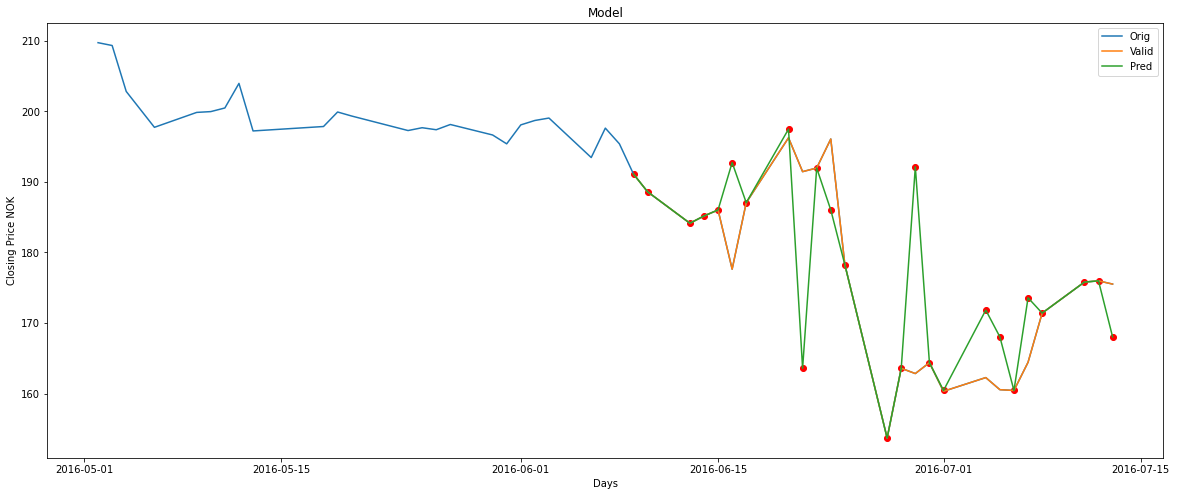

In [14]:
predictions = tree_prediction
#Creating a graph for the valid closing prices compared to the algorithms prediction prices
valid = inputdf.tail(prediction_days).copy()
valid['Actual Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price NOK')
#Here we are plotting each date the algorithm has predicted the price
plt.scatter(valid['Date'],valid['Actual Predictions'], color = 'red')
#Here we are creating the graph and set it to keep the size close to the prices
plt.plot(inputdf['Date'][-(prediction_days+25):],inputdf['Close'][-(prediction_days+25):])
plt.plot(valid['Date'],valid[['Close','Actual Predictions']])
plt.legend(['Orig','Valid','Pred'])
plt.show()

In [20]:
predictedPrice = valid['Actual Predictions'].iloc[-1]
actualPrice = inputdf['Close'].iloc[-1]
print("The predicted price for the date : "+inputdato+" = "+predictedPrice.astype(str))
print("The actual price on this date was : "+actualPrice.astype(str))
predictionScore = 100-round(((abs(predictedPrice - actualPrice)/actualPrice)*100), 2)
print("The prediction score was : "+str(predictionScore)+"%")
trainingScore = round(tree.score(x_test,y_test)*100,2)
print("Here is the training score for the algorithm "+str(trainingScore)+"%")

The predicted price for the date : 2016-07-13 = 168.030502
The actual price on this date was : 175.514999
The prediction score was : 95.74%
Here is the training score for the algorithm 87.85%
